##Bring in libraries and dataframes and set indexes

In [2]:
import datetime
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
#Read in data calibrated VWC data
Data = pd.read_pickle('.\DataFrames\LysoVWC_df')

## Set time slice to graph

In [10]:
from datetime import timedelta #Import function needed for doing date deltas 
EndDate = Data.index.max()  #Set end of series as most recent date in file
EndDateString = EndDate.strftime("%Y-%m-%d")  #Turn this to a string
PlotDuration = 1
#Set the duration that you want to graph for
StartDate = EndDate - timedelta(weeks=PlotDuration)       #Set start date the specified duration before the end date 
StartDateString = StartDate.strftime("%Y-%m-%d")           #Turn that into a string
EndDate

Timestamp('2018-09-26 14:30:00')

##Graph all sensors to check for anomolies

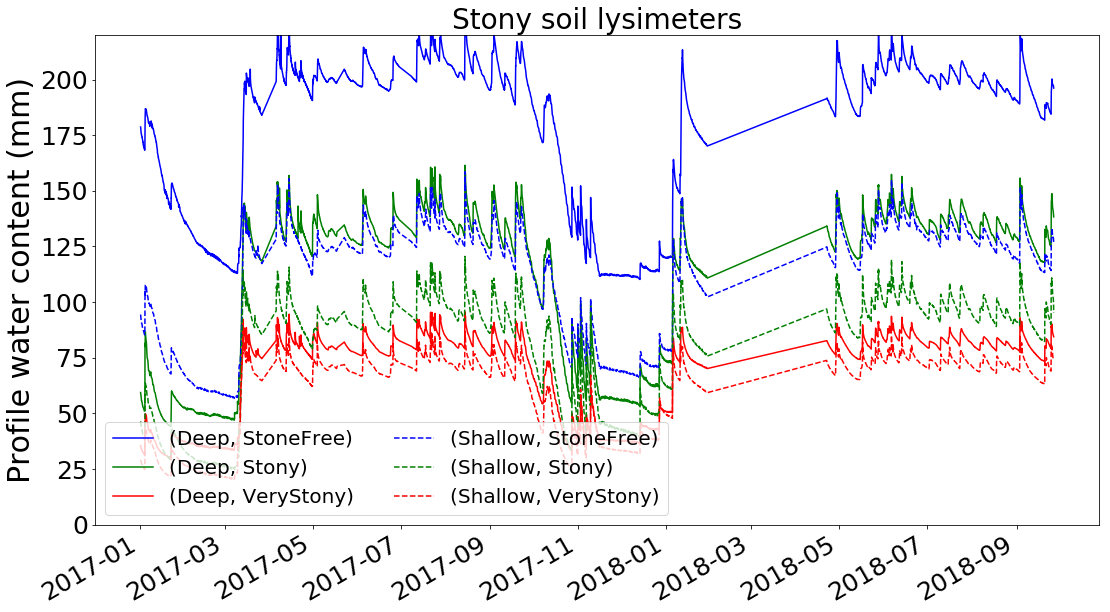

In [13]:
#Calculate treatment means omitting data prior to 2014-11-05 08:00:00 to avoid NaN values
#DataMeans =  Data.loc['2014-11-05 08:00:00':].groupby(level=['Depth','Gravels','Stones'],axis=1).mean()
DataMeans =  Data.loc['2017-01-01 08:00:00':].groupby(level=['Depth','Gravels','Stones'],axis=1).mean()
DataMeans =  DataMeans.dropna(axis=1) #For some reason it keeps non valid combinations in so need to extract with this function
DataMeans.where(DataMeans<0.7,np.nan,inplace=True)

#Calculate the water content of the soil profile by multiplying the volumetric water content by each layers
#depth and summing.  The 0-15 layers are divided by 2 to average the two readings
ProfileWater = DataMeans.loc[:,'D1'] * 150 + \
               DataMeans.loc[:,'D2'] * 150 + \
               DataMeans.loc[:,'D3'] * 150 + \
               DataMeans.loc[:,'D4'] * 150 
                
ProfileWater.plot(figsize=(18,10),style=['b-','g-','r-','b--','g--','r--'],ylim=(0,220))
plt.ylabel('Profile water content (mm)', fontsize=30);
plt.tick_params(labelsize=25)
plt.title('Stony soil lysimeters', fontsize=28)
plt.legend(fontsize = 20, loc=3, ncol=2)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':


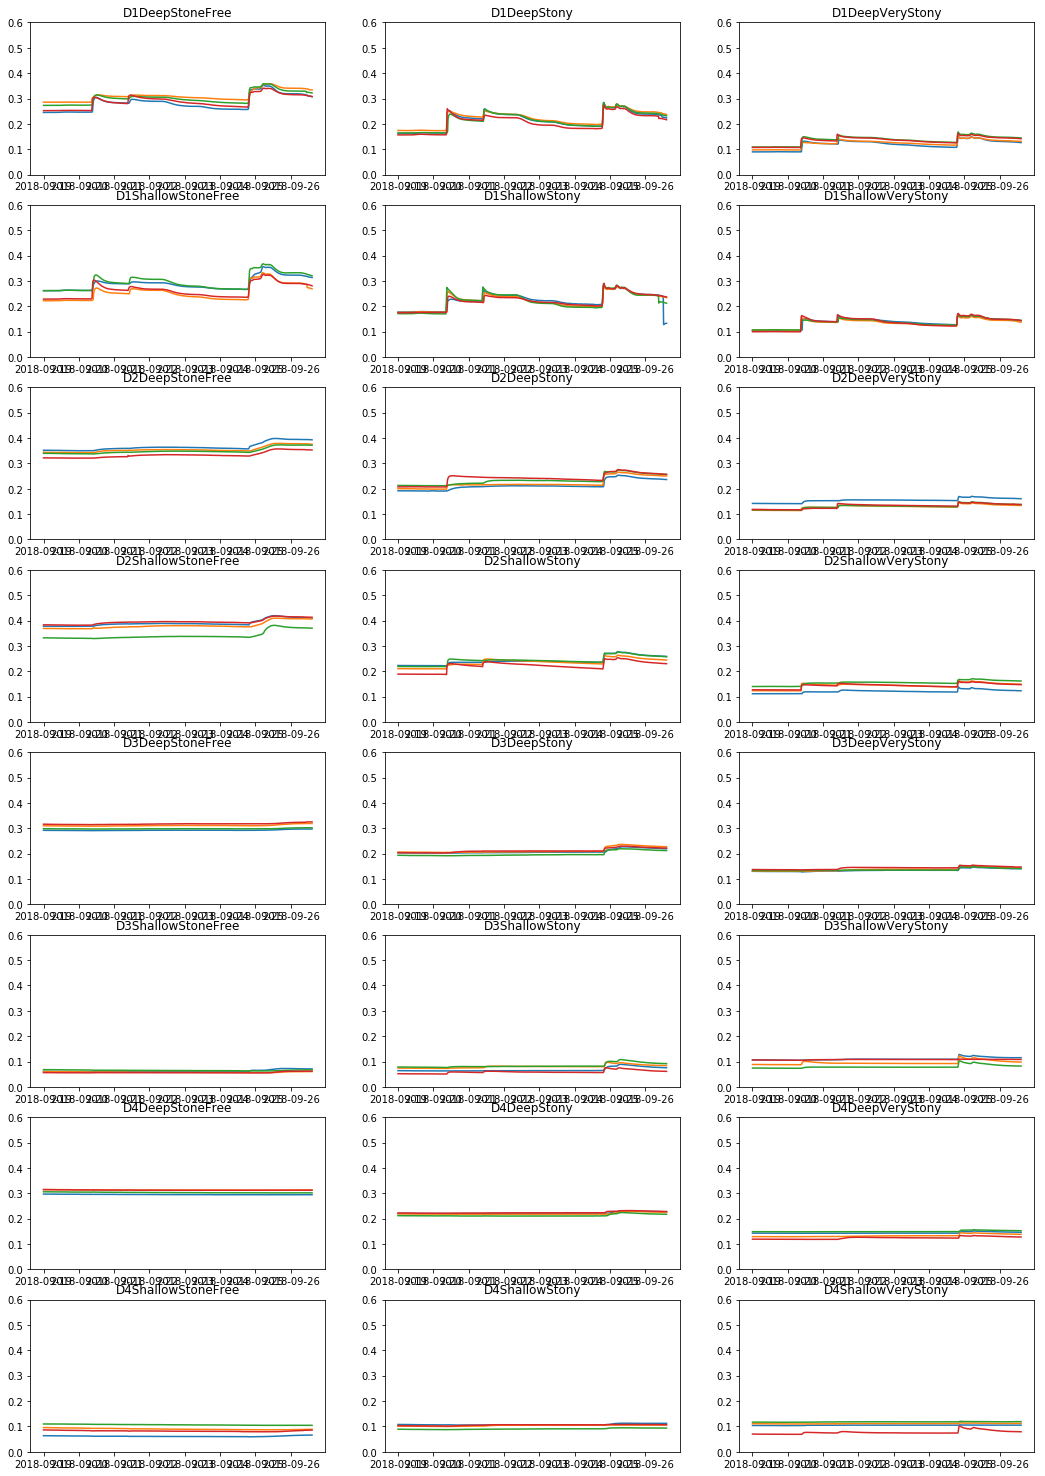

In [14]:
Depths = ['D1','D2','D3','D4']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']

Graph = plt.figure(figsize=(18,80))

Pos = 1
for Depth in Depths:    
    for Grav in Gravels:
        for Ston in Stones:
            fig = Graph.add_subplot(24,3,Pos)
            plt.plot(Data.loc[StartDateString::,(Depth,Grav,Ston)].index,Data.loc[StartDateString::,(Depth,Grav,Ston)])
            Pos +=1
            plt.ylim(0,0.6)
            plt.title(Depth+Grav+Ston)

## Graph treatment means by layer

C:\Anaconda\lib\site-packages\matplotlib\artist.py:882: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  return func(v)


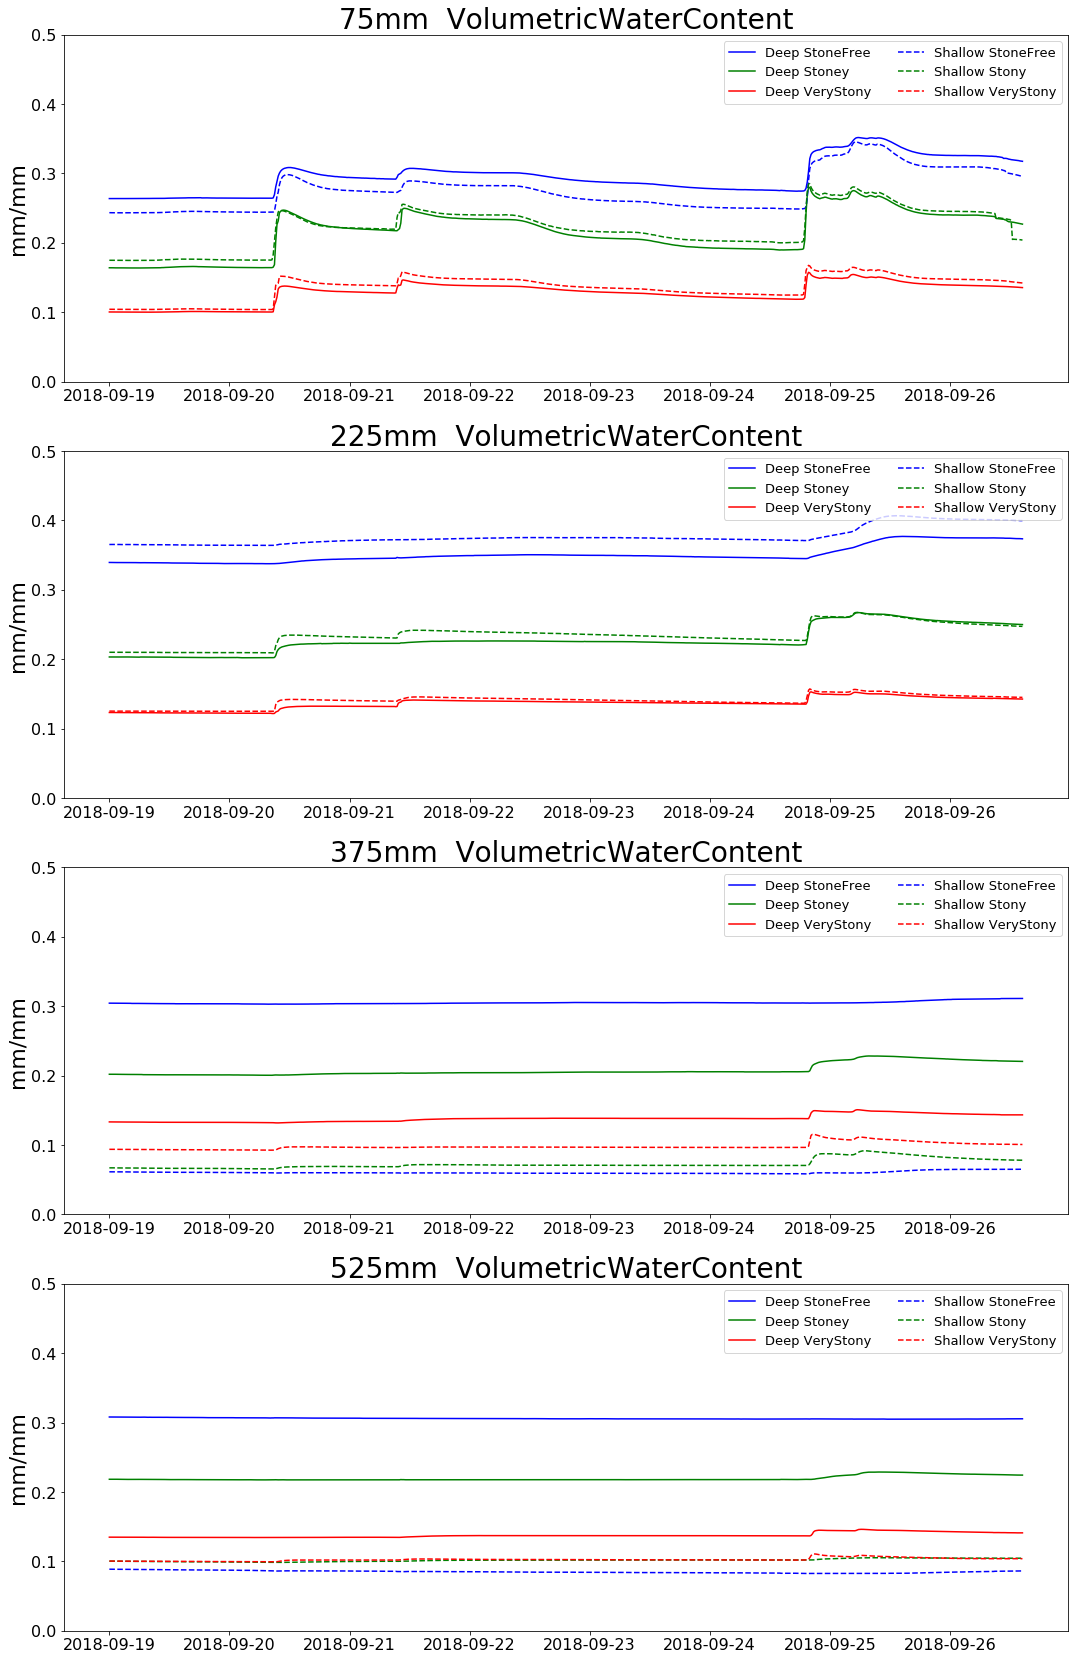

In [7]:
MeanLookSlice =  Data.loc['2014-11-05 08:00:00':].groupby(level=['Gravels','Stones','Depth'],axis=1).mean()

MeanLookSlice = MeanLookSlice.loc[StartDateString:]
MeanLookSlice.where(MeanLookSlice<0.7,np.nan,inplace=True)


Fig = plt.figure(figsize=(18, 60))

def MakePlot(Position, Depth, LayerThickness, Ymax, DepthLabel):
        Fig.add_subplot(8,1,Position, color_cycle=['b','g','r','b','g','r'])
        plt.title(DepthLabel + '  VolumetricWaterContent', fontsize=28);
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.StoneFree.loc[StartDateString:,Depth]*LayerThickness, '-', label='Deep StoneFree');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.Stony.loc[StartDateString:,Depth]*LayerThickness, '-', label='Deep Stoney');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.VeryStony.loc[StartDateString:,Depth]*LayerThickness,'-', label='Deep VeryStony');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.StoneFree.loc[StartDateString:,Depth]*LayerThickness, '--', label='Shallow StoneFree');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.Stony.loc[StartDateString:,Depth]*LayerThickness, '--', label='Shallow Stony');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.VeryStony.loc[StartDateString:,Depth]*LayerThickness, '--', label='Shallow VeryStony');
        plt.ylabel('mm/mm', fontsize=22);
        plt.tick_params(labelsize=16);
        plt.ylim(0,Ymax);
        plt.legend(loc=1, fontsize=13, ncol=2)
        return;

MakePlot(1,'D1',1,.5, '75mm')
MakePlot(2,'D2',1,.5, '225mm')
MakePlot(3,'D3',1,.5, '375mm')
MakePlot(4,'D4',1,.5, '525mm')